In [3]:
import numpy as np
import matplotlib.pylab as plt

In [4]:

def Weight(phi,A=5, phi_o=0):
    return 1-(0.5*np.tanh(A*((np.abs(phi)-phi_o)))+0.5)

def annot_max(x,y, ax=None):
    x=np.array(x)
    y=np.array(y) 
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

def plotweighting(philist, A, phi_o, enumeration):
    label=enumeration
    plt.plot(philist,[Weight(phi, A = A, phi_o = phi_o) for phi in philist], label = label)

In [24]:
def TestPlot(philist,delta, A,phi_o, EleWidth):
    plt.figure(figsize= [10, 4],dpi=100)
    plotweighting(philist, A, phi_o,"")
    
    Linestyle={'c':'k','ls':'-.'}
    plt.axvline([delta],**Linestyle);plt.axvline([-delta],**Linestyle)

    for numEleBorder in range(1,4):
        EleLim = delta-numEleBorder*EleWidth;
        plt.axvline([EleLim],c="k");plt.axvline([-EleLim],c="k")



    plt.xlabel("$\phi$")
    plt.title(r"Tanh blending - Element width: ${}$".format(EleWidth))
    plt.grid()
    plt.xlim([1500-200,1500+10])
    plt.show()
    

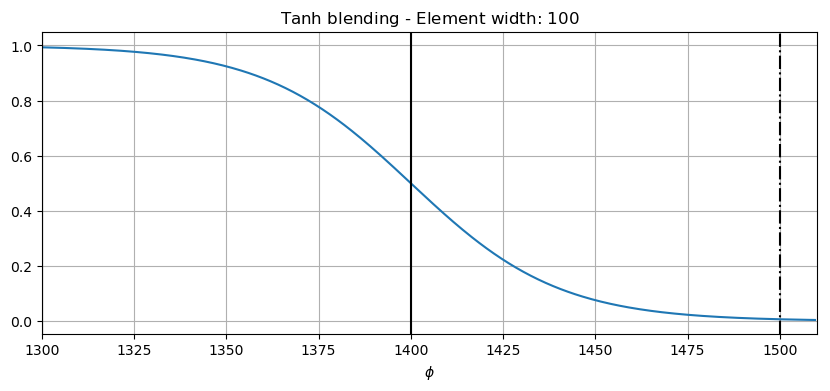

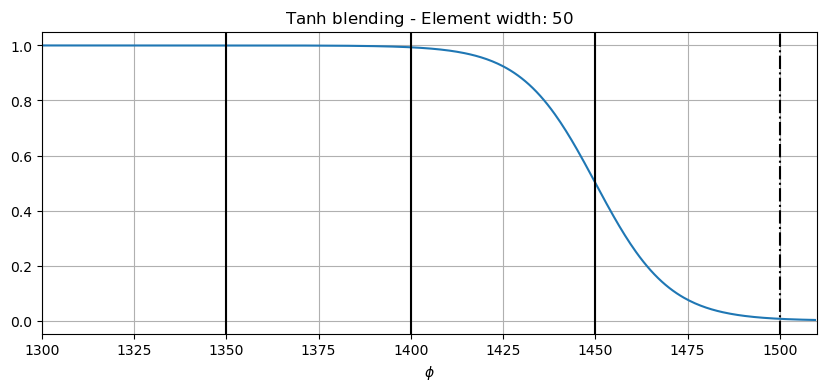

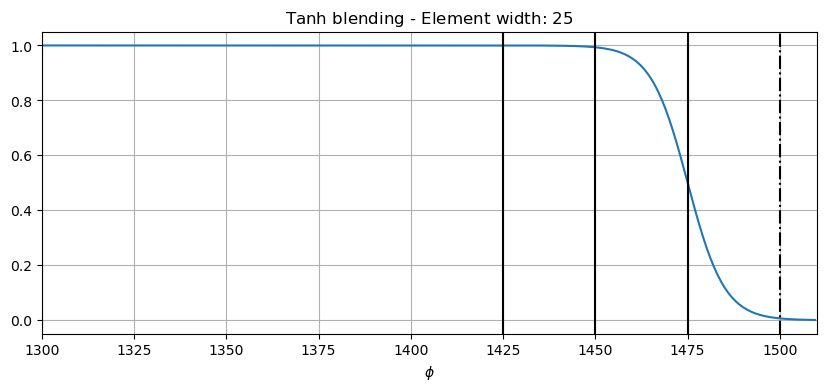

In [27]:
delta = 1500;

philist=np.arange(-(delta+10),(delta+10),.5).tolist()

MultEW= 1.
MultA = 2.5
EleWidth = 100
A =MultA/EleWidth; phi_o = delta-MultEW*EleWidth;
TestPlot(philist,delta, A,phi_o, EleWidth)

EleWidth = 50
A =MultA/EleWidth; phi_o = delta-MultEW*EleWidth;
TestPlot(philist,delta, A,phi_o, EleWidth)

EleWidth = 25
A =MultA/EleWidth; phi_o = delta-MultEW*EleWidth;
TestPlot(philist,delta, A,phi_o, EleWidth)
